# Homework 1: Applied Machine Learning - Linear | Logisitc | SVM

In [1]:
print("Name --> Davit Barblishvili")
print("UNI --> db3230")

Name --> Davit Barblishvili
UNI --> db3230


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from category_encoders import TargetEncoder
from sklearn.compose import make_column_transformer

In [3]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [4]:
pd.options.mode.chained_assignment = None

#**Part 1: Linear Regression**

In part 1, we will use **two datasets** to train and evaluate our linear regression model.

The first dataset will be a synthetic dataset sampled from the following equations:
   
**𝜖 ∼ Normal(0,3**)

**z = 3𝑥 + 10y + 10 + 𝜖**

In [5]:
np.random.seed(0)
epsilon = np.random.normal(0, 3, 100)
x = np.linspace(0, 10, 100) 
y = np.linspace(0, 5, 100)
z = 3 * x + 10 * y + 10 + epsilon


To apply linear regression, we need to first check if the assumptions of linear regression are not violated.

Assumptions of Linear Regression:

- Linearity: $y$ is a linear (technically affine) function of $x$.
- Independence: the $x$'s are independently drawn, and not dependent on each other.
- Homoscedasticity: the $\epsilon$'s, and thus the $y$'s, have constant variance.
- Normality: the $\epsilon$'s are drawn from a Normal distribution (i.e. Normally-distributed errors)

These properties, as well as the simplicity of this dataset, will make it a good test case to check if our linear regression model is working properly.

**1.1. Plot z vs x and z vs y in the synthetic dataset as scatter plots. Label your axes and make sure your y-axis starts from 0. Do the independent and dependent features have linear relationship?**

<AxesSubplot:xlabel='x-label', ylabel='z-label'>

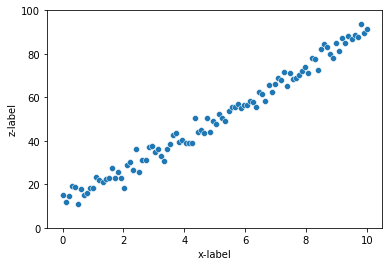

In [6]:
### Your code here
plt.ylim(0, 100)
plt.xlabel("x-label")
plt.ylabel("z-label")
sns.scatterplot(x = x, y = z)

<AxesSubplot:xlabel='y-label', ylabel='z-label'>

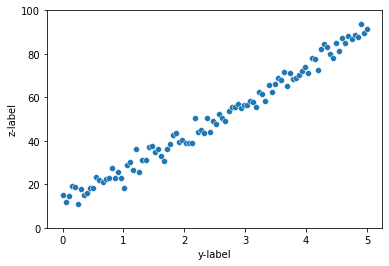

In [7]:
### Your code here
plt.ylim(0, 100)
plt.xlabel("y-label")
plt.ylabel("z-label")
sns.scatterplot(x = y, y = z)

**1.2. Are the independent variables correlated? Use pearson correlation to verify? What would be the problem if linear regression is applied to correlated features?**

In [8]:
### Your code here
pearson_correlation = np.corrcoef(x, y)
print(pearson_correlation)
    
# Yes they are highly correlated and that is not a good result. 
# For a linear regression, highly correlated features might will result in highly unstable parameter estimates.


[[1. 1.]
 [1. 1.]]


**The second dataset we will be using is an auto MPG dataset. This dataset contains various characteristics for around 8128 cars. We will use linear regression to predict the selling_price label**

In [9]:
auto_mpg_df = pd.read_csv('Car details v3.csv')
# Dropping Torque column, there is information in this column but it will take some preprocessing.
# The idea of the exercise is to familarize yourself with the basics of Linear regression.
auto_mpg_df = auto_mpg_df.drop(['torque'], axis = 1)

In [10]:
auto_mpg_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0


**1.3. Missing Value analysis - Auto mpg dataset.**

**Are there any missing values in the dataset? If so, what can be done about it? Jusify your approach.**

In [11]:
### Your code here
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      auto_mpg_df.isnull().sum())

# considering we have 8128 rows, I believe it would be a good idea to remove the rows that have the NaN values. 
# There are some other methods to deal with NaN values such as column removal, but in this case it is not going to
# work because out of 8128 only 2xx rows do not have data in a several columns so deleting the entire column for
# that is not useful. One more way is to interpolate the values meaning averaging based on the neighboring
# values, but after looking at the data, I do not think there is a good correlation between let's say 
# selling price and mileage, so removing the rows that include NaN values remains the best option. 


 
Count total NaN at each column in a DataFrame : 

 name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64


In [12]:
auto_mpg_df = auto_mpg_df.dropna(axis=0)

print(" \nCount total NaN at each column in a DataFrame : \n\n",
      auto_mpg_df.isnull().sum())

auto_mpg_df


 
Count total NaN at each column in a DataFrame : 

 name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0


In [13]:
# checking individual features

print(auto_mpg_df['name'].isna().sum())
print(auto_mpg_df['year'].isna().sum())
print(auto_mpg_df['selling_price'].isna().sum())
print(auto_mpg_df['km_driven'].isna().sum())
print(auto_mpg_df['seller_type'].isna().sum())
print(auto_mpg_df['transmission'].isna().sum())
print(auto_mpg_df['owner'].isna().sum()) 
print(auto_mpg_df['mileage'].isna().sum())
print(auto_mpg_df['engine'].isna().sum())
print(auto_mpg_df['max_power'].isna().sum()) 
print(auto_mpg_df['seats'].isna().sum())

0
0
0
0
0
0
0
0
0
0
0


**1.4. The features engine, max_power and mileage have units in the dataset. In the real world if we have such datasets, we generally remove the units from each feature. After doing so, convert the datatype of these columns to float. For example: 1248 CC engine is 1248, 23.4 kmpl is 23.4 and so on.**

**Hint: Check for distinct units in each of these features. A feature might have multiple units as well. Also, a feature could have no value but have unit. For example 'CC' without any value. Remove such rows.**

In [14]:
auto_mpg_df["engine"].unique()

array(['1248 CC', '1498 CC', '1497 CC', '1396 CC', '1298 CC', '1197 CC',
       '1061 CC', '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC',
       '1198 CC', '1199 CC', '998 CC', '1591 CC', '2179 CC', '1368 CC',
       '2982 CC', '2494 CC', '2143 CC', '2477 CC', '1462 CC', '2755 CC',
       '1968 CC', '1798 CC', '1196 CC', '1373 CC', '1598 CC', '1998 CC',
       '1086 CC', '1194 CC', '1172 CC', '1405 CC', '1582 CC', '999 CC',
       '2487 CC', '1999 CC', '3604 CC', '2987 CC', '1995 CC', '1451 CC',
       '1969 CC', '2967 CC', '2497 CC', '1797 CC', '1991 CC', '2362 CC',
       '1493 CC', '1599 CC', '1341 CC', '1794 CC', '799 CC', '1193 CC',
       '2696 CC', '1495 CC', '1186 CC', '1047 CC', '2498 CC', '2956 CC',
       '2523 CC', '1120 CC', '624 CC', '1496 CC', '1984 CC', '2354 CC',
       '814 CC', '793 CC', '1799 CC', '936 CC', '1956 CC', '1997 CC',
       '1499 CC', '1948 CC', '2997 CC', '2489 CC', '2499 CC', '2609 CC',
       '2953 CC', '1150 CC', '1994 CC', '1388 CC', '1527 CC'

In [15]:
### Your code here
### cleaning column --> engine
auto_mpg_df["engine"] = auto_mpg_df["engine"].map(lambda x: x.rstrip('CC'))
auto_mpg_df["engine"] = auto_mpg_df["engine"].str.strip()
auto_mpg_df["engine"]= auto_mpg_df["engine"].astype(float)


In [16]:
kmkg = 0
kmpl = 0
for i in auto_mpg_df.mileage:
    if str(i).endswith("km/kg"):
        kmkg+=1
    elif str(i).endswith("kmpl"):
        kmpl+=1
print('The number of rows with Km/Kg : {} '.format(kmkg))
print('The number of rows with Kmpl : {} '.format(kmpl))

# since there are 88 rows it is not going to make a big difference overal how we deal with these 88 rows that 
# do not align with kmpl.

The number of rows with Km/Kg : 88 
The number of rows with Kmpl : 7819 


In [17]:
Correct_Mileage= []
for i in auto_mpg_df.mileage:
    if str(i).endswith('km/kg'):
        i = i[:-5]
        # conversion
        i = float(i)*1.40
        auto_mpg_df["mileage"] = auto_mpg_df["mileage"].str.strip()
        Correct_Mileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-4]
        auto_mpg_df["mileage"] = auto_mpg_df["mileage"].str.strip()
        Correct_Mileage.append(float(i))
auto_mpg_df['mileage']=Correct_Mileage       

In [18]:
auto_mpg_df["max_power"].unique()

array(['74 bhp', '103.52 bhp', '78 bhp', '90 bhp', '88.2 bhp',
       '81.86 bhp', '57.5 bhp', '37 bhp', '67.1 bhp', '68.1 bhp',
       '108.45 bhp', '60 bhp', '73.9 bhp', '67 bhp', '82 bhp', '88.5 bhp',
       '46.3 bhp', '88.73 bhp', '64.1 bhp', '98.6 bhp', '88.8 bhp',
       '83.81 bhp', '83.1 bhp', '47.3 bhp', '73.8 bhp', '34.2 bhp',
       '35 bhp', '81.83 bhp', '40.3 bhp', '121.3 bhp', '138.03 bhp',
       '160.77 bhp', '117.3 bhp', '116.3 bhp', '83.14 bhp', '67.05 bhp',
       '168.5 bhp', '100 bhp', '120.7 bhp', '98.63 bhp', '175.56 bhp',
       '103.25 bhp', '171.5 bhp', '100.6 bhp', '174.33 bhp', '187.74 bhp',
       '170 bhp', '78.9 bhp', '88.76 bhp', '86.8 bhp', '108.495 bhp',
       '108.62 bhp', '93.7 bhp', '103.6 bhp', '98.59 bhp', '189 bhp',
       '67.04 bhp', '68.05 bhp', '58.2 bhp', '82.85 bhp', '81.80 bhp',
       '73 bhp', '120 bhp', '94.68 bhp', '160 bhp', '65 bhp', '155 bhp',
       '69.01 bhp', '126.32 bhp', '138.1 bhp', '83.8 bhp', '126.2 bhp',
       '98.96 bh

In [19]:
### cleaning column --> max_power
auto_mpg_df["max_power"] = auto_mpg_df["max_power"].map(lambda x: x.rstrip('bhp'))
auto_mpg_df["max_power"] = auto_mpg_df["max_power"].str.strip()

In [20]:
auto_mpg_df['max_power'] = auto_mpg_df['max_power'].replace('', float('NaN'))
auto_mpg_df = auto_mpg_df.dropna()
auto_mpg_df["max_power"]= auto_mpg_df["max_power"].astype(float)

In [21]:
auto_mpg_X = auto_mpg_df.drop(columns=['selling_price'])
auto_mpg_y = auto_mpg_df['selling_price']

**1.5. Plot the distribution of the label (selling_price) using a histogram. Make multiple plots with different binwidths. Make sure to label your axes while plotting.**

/var/folders/hc/1s53gb2x4170pxgm9cmzd3s00000gn/T/ipykernel_39795/2357932289.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


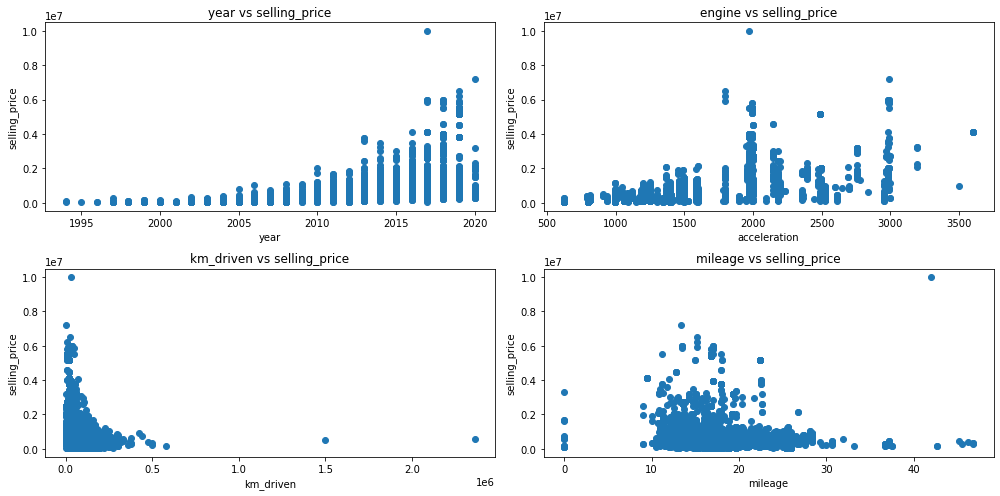

In [22]:
### Your code here

fig, ax = plt.subplots(2,2, figsize=(14,7))
ax[0][0].scatter(auto_mpg_X['year'], auto_mpg_y)
ax[0][0].set_xlabel('year')
ax[0][0].set_ylabel('selling_price')
ax[0][0].set_title('year vs selling_price')
ax[1][0].scatter(auto_mpg_X['km_driven'], auto_mpg_y)
ax[1][0].set_ylabel('selling_price')
ax[1][0].set_xlabel('km_driven')
ax[1][0].set_title('km_driven vs selling_price')
ax[1][1].scatter(auto_mpg_X['mileage'], auto_mpg_y)
ax[1][1].set_ylabel('selling_price')
ax[1][1].set_xlabel('mileage')
ax[1][1].set_title('mileage vs selling_price')
ax[0][1].scatter(auto_mpg_X['engine'], auto_mpg_y)
ax[0][1].set_ylabel('selling_price')
ax[0][1].set_xlabel('acceleration')
ax[0][1].set_title('engine vs selling_price')

fig.tight_layout() 
fig.show()

<AxesSubplot:title={'center':'Histogram of Selling Price'}, xlabel='Selling Price', ylabel='Frequency'>

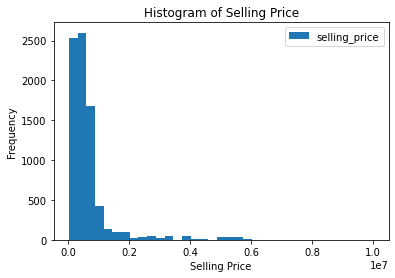

In [23]:


maxAmount = max(auto_mpg_y)
plt.xlabel('Selling Price')
plt.ylabel("Number of Vehicles");
auto_mpg_y.plot.hist(bins=35, legend=True, title='Histogram of Selling Price',)

<AxesSubplot:title={'center':'Histogram of Selling Price'}, xlabel='Selling Price', ylabel='Frequency'>

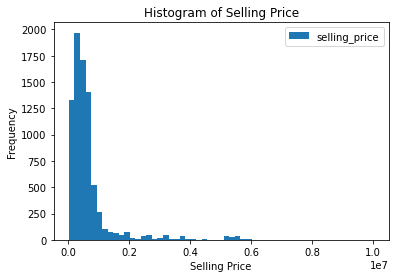

In [24]:

maxAmount = max(auto_mpg_y)
plt.xlabel('Selling Price')
plt.ylabel("Number of Vehicles");
auto_mpg_y.plot.hist(bins=55, legend=True, title='Histogram of Selling Price',)

<AxesSubplot:title={'center':'Histogram of Selling Price'}, xlabel='Selling Price', ylabel='Frequency'>

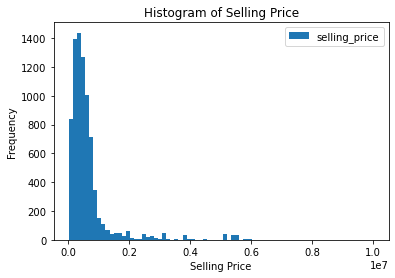

In [25]:

maxAmount = max(auto_mpg_y)
plt.xlabel('Selling Price')
plt.ylabel("Number of Vehicles");
auto_mpg_y.plot.hist(bins=75, legend=True, title='Histogram of Selling Price',)


**1.6. Plot the relationships between the label (Selling Price) and the continuous features (Mileage, km driven, engine, max power) using a small multiple of scatter plots. 
Make sure to label the axes. Do you see something interesting about the distributions of these features.**

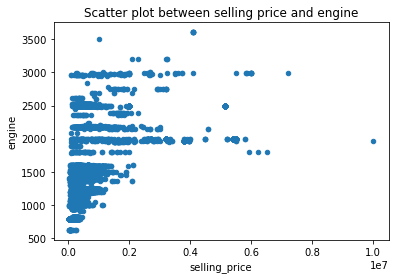

In [26]:
### Your code here
auto_mpg_df.plot.scatter(x='selling_price', y='engine', title= "Scatter plot between selling price and engine");

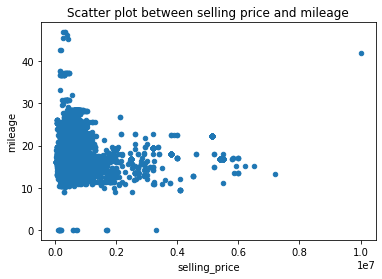

In [27]:
auto_mpg_df.plot.scatter(x='selling_price', y='mileage', 
                         title= "Scatter plot between selling price and mileage");

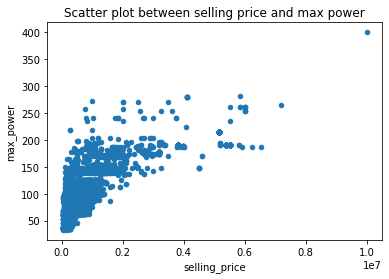

In [28]:
auto_mpg_df.plot.scatter(x='selling_price', y='max_power', 
                         title= "Scatter plot between selling price and max power");

### max power is not that popular determiner of the car's popularity. Same signs are appearing here. 
### The average power car cost the average price

<AxesSubplot:title={'center':'Scatter plot between selling price and km driven'}, xlabel='selling_price', ylabel='km_driven'>

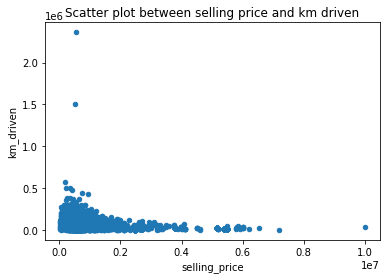

In [29]:
auto_mpg_df.plot.scatter(x='selling_price', y='km_driven', title= 
                         "Scatter plot between selling price and km driven")

### lower the km driver the higher the concentration of points

**1.7. Plot the relationships between the label (Selling Price) and the discrete features (fuel type, Seller type, transmission) using a small multiple of box plots. Make sure to label the axes.**

<AxesSubplot:xlabel='fuel', ylabel='selling_price'>

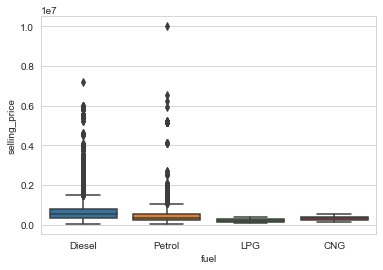

In [30]:
### Your code here

sns.set_style("whitegrid")
sns.boxplot(x = 'fuel', y = 'selling_price', data = auto_mpg_df)

<AxesSubplot:xlabel='transmission', ylabel='selling_price'>

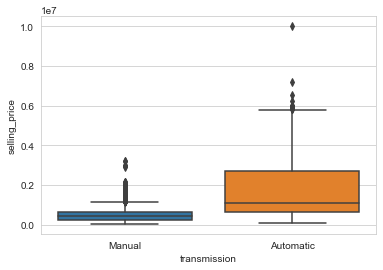

In [31]:
sns.set_style("whitegrid")
sns.boxplot(x = 'transmission', y = 'selling_price', data = auto_mpg_df)

<AxesSubplot:xlabel='seller_type', ylabel='selling_price'>

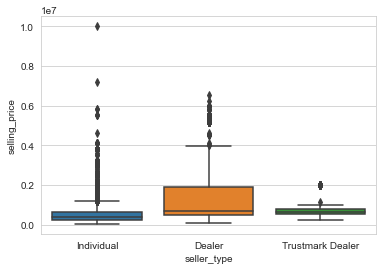

In [32]:
sns.set_style("whitegrid")
sns.boxplot(x = 'seller_type', y = 'selling_price', data = auto_mpg_df)

<AxesSubplot:xlabel='owner', ylabel='selling_price'>

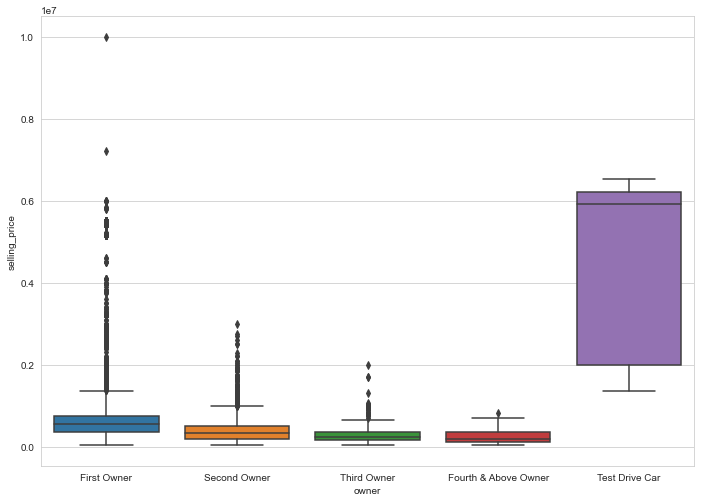

In [33]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27
sns.set_style("whitegrid")
sns.boxplot(x = 'owner', y = 'selling_price', data = auto_mpg_df)

**1.8. From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not?**

In [34]:
### Your answer here
### I think linear regression is a good model for this problem since we need to find the best model
### to fit the data which seems equally distributed around the mean and does not have that many outliers. additionally
### from the above, it appears many variables do have a linear relationship and are correlated to price which allows
### us to ise linear regression to uncover different relationships. 
### once we have the model, predicting selling price of the vehicle given let's say fuel type is just finding 
### the 'y' value. 

In [35]:
auto_mpg_X['year'] =  2020 - auto_mpg_X['year']

In [36]:
#dropping the car name as it is irrelevant.
auto_mpg_X.drop(['name'],axis = 1,inplace=True)

#check out the dataset with new changes
auto_mpg_X.head()



,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,6,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,6,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,14,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,10,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,13,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


**Data Pre-processing**

**1.9.
Before we can fit a linear regression model, there are several pre-processing steps we should apply to the datasets:**
1. Encode categorial features appropriately.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices X_train, X_val, and X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from X_train, and apply it to X_train, X_val, and X_test.
4. Add a column of ones to the feature matrices X_train, X_val, and X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.


In [37]:
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      auto_mpg_X.isnull().sum())

# dataset does not have nan values

 
Count total NaN at each column in a DataFrame : 

 year            0
km_driven       0
fuel            0
seller_type     0
transmission    0
owner           0
mileage         0
engine          0
max_power       0
seats           0
dtype: int64


In [38]:
X = x.reshape((100, 1))   # Turn the x vector into a feature matrix X

# 1. No categorical features in the synthetic dataset (skip this step)

# 2. Split the dataset into training (60%), validation (20%), and test (20%) sets
X_dev, X_test, y_dev, y_test = train_test_split(X, z, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=0)

# 3. Standardize the columns in the feature matrices
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # Fit and transform scalar on X_train
X_val = scaler.transform(X_val)           # Transform X_val
X_test = scaler.transform(X_test)         # Transform X_test

# 4. Add a column of ones to the feature matrices
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

print(X_train[:5])
print(y_train[:5])

[[ 1.          0.53651502]
 [ 1.         -1.00836082]
 [ 1.         -0.72094206]
 [ 1.         -0.25388657]
 [ 1.          0.64429705]]
[58.44273829 26.35936352 36.18499261 44.02659901 65.91341194]


In [39]:
print(X_train.mean(axis=0), X_train.std(axis=0))
print(X_val.mean(axis=0), X_val.std(axis=0))
print(X_test.mean(axis=0), X_test.std(axis=0))

[ 1.00000000e+00 -4.81096644e-17] [0. 1.]
[ 1.        -0.1263445] [0.         1.03471221]
[ 1.         -0.15508637] [0.         1.13264481]


In [40]:
auto_mpg_y

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 7906, dtype: int64

In [41]:
# 1. No categorical features in the synthetic dataset (skip this step)

num_features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
cat_features = ['fuel', 'seller_type', 'transmission', 'owner']
all_features_mpg = cat_features + num_features + ['Bias']
auto_mpg_X['Bias'] = 1

# 2. Split the dataset into training (60%), validation (20%), and test (20%) sets
auto_mpg_X_dev, auto_mpg_X_test, auto_mpg_y_dev, auto_mpg_y_test = train_test_split(auto_mpg_X, auto_mpg_y, test_size=0.2, random_state=0)
auto_mpg_X_train, auto_mpg_X_val, auto_mpg_y_train, auto_mpg_y_val = train_test_split(auto_mpg_X_dev, auto_mpg_y_dev, test_size=0.25, random_state=0)

column_transformer = make_column_transformer((StandardScaler(), num_features),
                                           (TargetEncoder(), cat_features),
                                            remainder='passthrough')
# 3. Standardize the columns in the feature matrices
auto_mpg_X_train = column_transformer.fit_transform(auto_mpg_X_train,auto_mpg_y_train)
auto_mpg_X_val = column_transformer.transform(auto_mpg_X_val)
auto_mpg_X_test = column_transformer.transform(auto_mpg_X_test)



In [42]:
print(auto_mpg_X_train.mean(axis=0), auto_mpg_X_train.std(axis=0))
print(auto_mpg_X_val.mean(axis=0), auto_mpg_X_val.std(axis=0))
print(auto_mpg_X_test.mean(axis=0), auto_mpg_X_test.std(axis=0))

[ 9.06342726e-17 -4.04483531e-17 -1.55801064e-16  9.58775777e-17
  1.28835495e-16 -2.24713073e-17  6.38882799e+05  6.38882799e+05
  6.38882799e+05  6.38811413e+05  1.00000000e+00] [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.54633592e+05 3.14277330e+05
 4.61658942e+05 2.25336091e+05 0.00000000e+00]
[ 1.59727079e-02 -2.80115549e-02 -3.04962880e-02 -2.41315526e-02
  2.30409922e-02 -1.47826034e-02  6.33904099e+05  6.35561683e+05
  6.61820554e+05  6.31908703e+05  1.00000000e+00] [1.04392030e+00 7.44488269e-01 1.02048637e+00 9.81783397e-01
 1.03471675e+00 1.01082503e+00 1.55466660e+05 3.10655294e+05
 4.86397686e+05 1.91164234e+05 0.00000000e+00]
[-1.97506832e-02 -2.51129173e-02  9.41304364e-03 -4.02800489e-03
 -5.56405257e-03 -1.82101300e-03  6.31320826e+05  6.43982731e+05
  6.60813974e+05  6.31750582e+05  1.00000000e+00] [9.83789131e-01 7.86338547e-01 1.03779420e+00 1.00878538e+00
 1.00590351e+00 1.00766001e+00 1.56472960e+05 3.18099866e+05


**At the end of this pre-processing, you should have the following vectors and matrices:**

**- Auto MPG dataset: auto_mpg_X_train, auto_mpg_X_val, auto_mpg_X_test, auto_mpg_y_train, auto_mpg_y_val, auto_mpg_y_test**

**Implement Linear Regression**

Now, we can implement our linear regression model! Specifically, we will be implementing ridge regression, which is linear regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for linear regression is:

$$
y = X w
$$

Note that we can omit the bias term here because we have included a column of ones in our $X$ matrix, so the bias term is learned implicitly as a part of $w$. This will make our implementation easier.

Our objective in linear regression is to learn the weights $w$ which best fit the data. This notion can be formalized as finding the optimal $w$ which minimizes the following loss function:

$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

This is the ridge regression loss function. The $\| X w - y \|^2_2$ term penalizes predictions $Xw$ which are not close to the label $y$. And the $\alpha \| w \|^2_2$ penalizes large weight values, to favor a simpler, more generalizable model. The $\alpha$ hyperparameter, known as the regularization parameter, is used to tune the complexity of the model - a higher $\alpha$ results in smaller weights and lower complexity, and vice versa. Setting $\alpha = 0$ gives us vanilla linear regression.

Conveniently, ridge regression has a closed-form solution which gives us the optimal $w$ without having to do iterative methods such as gradient descent. The closed-form solution, known as the Normal Equations, is given by:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$

**1.10. Implement a `LinearRegression` class with two methods: `train` and `predict`. You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.**

In [43]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        None
        '''
        
        num_rows, num_cols = X.shape

        LHS = inv(np.matmul(X.T,X) + self.alpha*np.identity(num_cols))
        RHS = np.matmul(X.T,y)
        w = np.matmul(LHS,RHS)
        self.w = w
        
    def predict(self, X):
        '''Predicts on X using trained model.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) prediction vector
        '''
        ### Your code here
        
        y_pred = np.matmul(X, self.w)
        return y_pred

**Train, Evaluate, and Interpret Linear Regression Model**

**1.11. A) Train a linear regression model ($\alpha = 0$) on the auto MPG training data. Make predictions and report the mean-squared error (MSE) on the training, validation, and test sets. Report the first 5 predictions on the test set, along with the actual labels.**

In [44]:
### Your code here
from sklearn.metrics import mean_squared_error
ridge_reg = LinearRegression(alpha=0)
ridge_reg.train(auto_mpg_X_train,auto_mpg_y_train)
ridge_reg_predictions = ridge_reg.predict(auto_mpg_X_test)
print('predictions for first 5 values from test set: ')
print(ridge_reg_predictions[:5])
print('actual first 5 values from test set: ')
print(auto_mpg_y_train[:5])

train_est = ridge_reg.predict(auto_mpg_X_train)
print('MSE using predicted from model on train set: ')
print(mean_squared_error(auto_mpg_y_train, train_est))

val_est = ridge_reg.predict(auto_mpg_X_val)
print('MSE using predicted from model on val set: ')
print(mean_squared_error(auto_mpg_y_val, val_est))

test_est = ridge_reg.predict(auto_mpg_X_test)
print('MSE using predicted from model on test set: ')
print(mean_squared_error(auto_mpg_y_test, test_est))


predictions for first 5 values from test set: 
[ 514637.90476326 1245392.54660809   94540.98040576  921886.11058349
  660311.36247431]
actual first 5 values from test set: 
5464    300000
2774    185000
5012    400000
3524    550000
918     700000
Name: selling_price, dtype: int64
MSE using predicted from model on train set: 
197293544752.44693
MSE using predicted from model on val set: 
253557239371.69687
MSE using predicted from model on test set: 
217717666389.34482


**B) As a baseline model, use the mean of the training labels (auto_mpg_y_train) as the prediction for all instances. Report the mean-squared error (MSE) on the training, validation, and test sets using this baseline. This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression MSEs should be much lower than these baseline MSEs.**

In [45]:
### Your code here
baseline_est = auto_mpg_y_train.mean()
baseline_train_est = np.full((len(auto_mpg_y_train),1), baseline_est)
print('MSE using baseline on train set: ')
print(mean_squared_error(auto_mpg_y_train, baseline_train_est))
baseline_val_est = np.full((len(auto_mpg_y_val),1), baseline_est)
print('MSE using baseline on val set: ')
print(mean_squared_error(auto_mpg_y_val, baseline_val_est))
baseline_test_est = np.full((len(auto_mpg_y_test),1), baseline_est)
print('MSE using baseline on test set: ')
print(mean_squared_error(auto_mpg_y_test, baseline_test_est))

MSE using baseline on train set: 
612322495881.2102
MSE using baseline on val set: 
809763045080.3438
MSE using baseline on test set: 
663032035101.6919


**1.12. Interpret your model trained on the auto MPG dataset using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term! Use lecture 3, slide 15 as a reference. According to your model, which features are the greatest contributors to the selling price**

In [46]:
all_features_mpg

['fuel',
 'seller_type',
 'transmission',
 'owner',
 'year',
 'km_driven',
 'mileage',
 'engine',
 'max_power',
 'seats',
 'Bias']

In [47]:
ridge_reg.w

array([-1.11919226e+05, -4.85942334e+04,  3.95411400e+04,  4.22909397e+04,
        4.31541184e+05, -4.27703212e+04,  1.78939755e-01,  2.40393687e-01,
        3.24473552e-01,  2.74120767e-01, -1.14341698e+04])

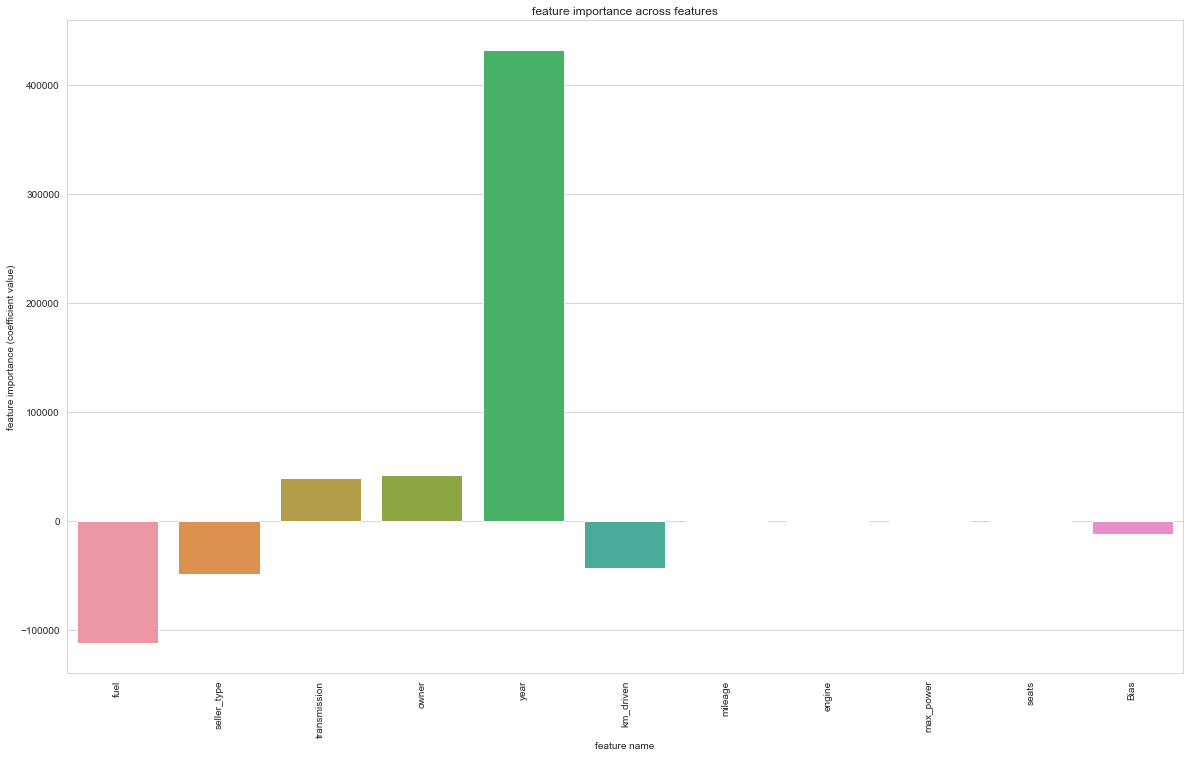

In [49]:
### Your code here
fig = plt.figure(figsize = (20,12))
xval = np.zeros((31))
yval = np.reshape(ridge_reg.w, -1)
ax = sns.barplot(x=all_features_mpg, y=yval)
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('feature name')
ax.set_ylabel('feature importance (coefficient value)')
ax.set_title('feature importance across features')
plt.show()

**Tune Regularization Parameter $\alpha$**

**Now, let's do ridge regression and tune the $\alpha$ regularization parameter on the auto MPG dataset.**

**1.13. Sweep out values for $\alpha$ using `alphas = np.logspace(-2, 1, 10)`. Perform a grid search over these $\alpha$ values, recording the training and validation MSEs for each $\alpha$. A simple grid search is fine, no need for k-fold cross validation. Plot the training and validation MSEs as a function of $\alpha$ on a single figure. Make sure to label the axes and the training and validation MSE curves. Use a log scale for the x-axis.**

[]

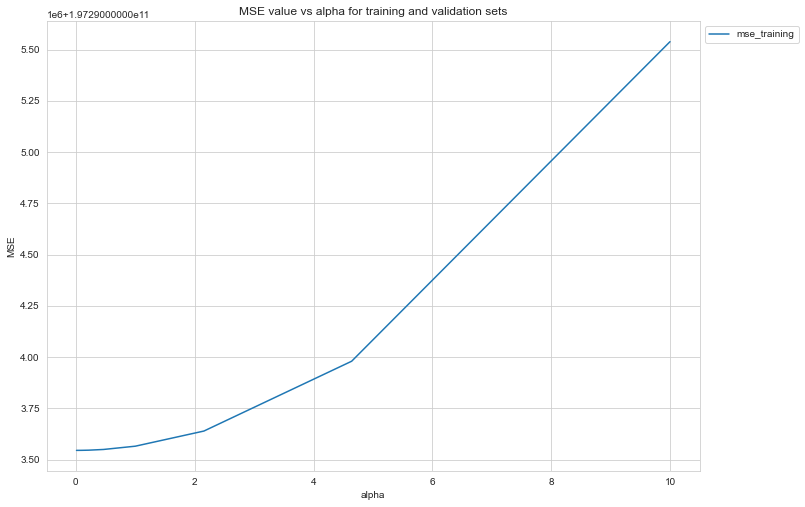

In [55]:
alphas = np.logspace(-2, 1, 10)
df_mses = pd.DataFrame(columns=['alpha', 'mse_training'])
for alpha in alphas: 
    model_lin = LinearRegression(alpha=alpha)
    model_lin.train(auto_mpg_X_train,auto_mpg_y_train)
    train_est = model_lin.predict(auto_mpg_X_train)
    train_mse = mean_squared_error(auto_mpg_y_train, train_est)
    
    val_est = model_lin.predict(auto_mpg_X_val)
    val_mse = mean_squared_error(auto_mpg_y_val, val_est)
    temp_df = pd.DataFrame(columns=['alpha', 'mse_training'], data=[[alpha, train_mse]])
    df_mses = df_mses.append(temp_df)

df_mses.head()
ax = df_mses.set_index('alpha').plot()
ax.legend(bbox_to_anchor=(1.0,1.0))
ax.set_ylabel('MSE')
ax.set_title('MSE value vs alpha for training')
ax.plot()

[]

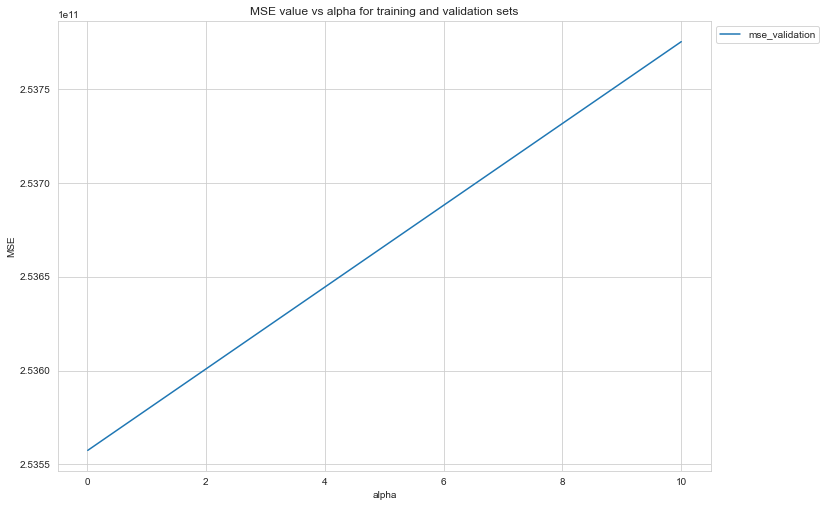

In [54]:
### Your code here
alphas = np.logspace(-2, 1, 10)
df_mses = pd.DataFrame(columns=['alpha', 'mse_validation'])
for alpha in alphas: 
    model_lin = LinearRegression(alpha=alpha)
    model_lin.train(auto_mpg_X_train,auto_mpg_y_train)
    train_est = model_lin.predict(auto_mpg_X_train)
    train_mse = mean_squared_error(auto_mpg_y_train, train_est)
    
    val_est = model_lin.predict(auto_mpg_X_val)
    val_mse = mean_squared_error(auto_mpg_y_val, val_est)
    temp_df = pd.DataFrame(columns=['alpha', 'mse_validation'], data=[[alpha,  val_mse]])
    df_mses = df_mses.append(temp_df)

df_mses.head()
ax = df_mses.set_index('alpha').plot()
ax.legend(bbox_to_anchor=(1.0,1.0))
ax.set_ylabel('MSE')
ax.set_title('MSE value vs alpha for validation set')
ax.plot()

**Explain your plot above. How do training and validation MSE behave with decreasing model complexity (increasing $\alpha$)?**

In [ ]:
### Your answer here
# As alpha increases both MSE for the training and validation increase as well. 

**1.14. Using the $\alpha$ which gave the best validation MSE above, train a model on the training set. Report the value of $\alpha$ and its training, validation, and test MSE. This is the final tuned model which you would deploy in production.**

In [56]:
### Your code here
print(df_mses)

prod_model = LinearRegression(alpha=.046416)
prod_model.train(auto_mpg_X_train, auto_mpg_y_train)
train_est = prod_model.predict(auto_mpg_X_train)
print('MSE using predicted from model on train set: ')
print(mean_squared_error(auto_mpg_y_train, train_est))

val_est = prod_model.predict(auto_mpg_X_val)
print('MSE using predicted from model on val set: ')
print(mean_squared_error(auto_mpg_y_val, val_est))

test_est = prod_model.predict(auto_mpg_X_test)
print('MSE using predicted from model on test set: ')
print(mean_squared_error(auto_mpg_y_test, test_est))


       alpha  mse_training
0   0.010000  1.972935e+11
0   0.021544  1.972935e+11
0   0.046416  1.972935e+11
0   0.100000  1.972935e+11
0   0.215443  1.972935e+11
0   0.464159  1.972935e+11
0   1.000000  1.972936e+11
0   2.154435  1.972936e+11
0   4.641589  1.972940e+11
0  10.000000  1.972955e+11
MSE using predicted from model on train set: 
197293544796.42923
MSE using predicted from model on val set: 
253558252544.48474
MSE using predicted from model on test set: 
217717789256.16647


# **Part 2: Logistic Regression**

**Gender Recognition by Voice and Speech Analysis**

**This dataset is used to identify a voice as male or female, based upon acoustic properties of the voice and speech.**

In [57]:
voice_df = pd.read_csv("voice-classification.csv")
voice_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


**Data - Checking Rows & Columns**

In [58]:
#Number of Rows & Columns
print(voice_df.shape) 

(3168, 21)


**2.1 What is the probability of observing different  categories in the Label feature of the dataset?**

This is mainly to check class imbalance in the dataset, and to apply different techniques to balance the dataset, which we will learn later.

In [59]:
voice_df.label.unique()

array(['male', 'female'], dtype=object)

In [60]:
#code here
male_count = len(voice_df[voice_df['label'] == 'male'])
female_count = len(voice_df[voice_df['label'] == 'female'])

female_count / (female_count + male_count)

0.5

**2.2 Plot the relationships between the label and the 20 numerical features using a small multiple of box plots. Make sure to label the axes. What useful information do this plot provide?**

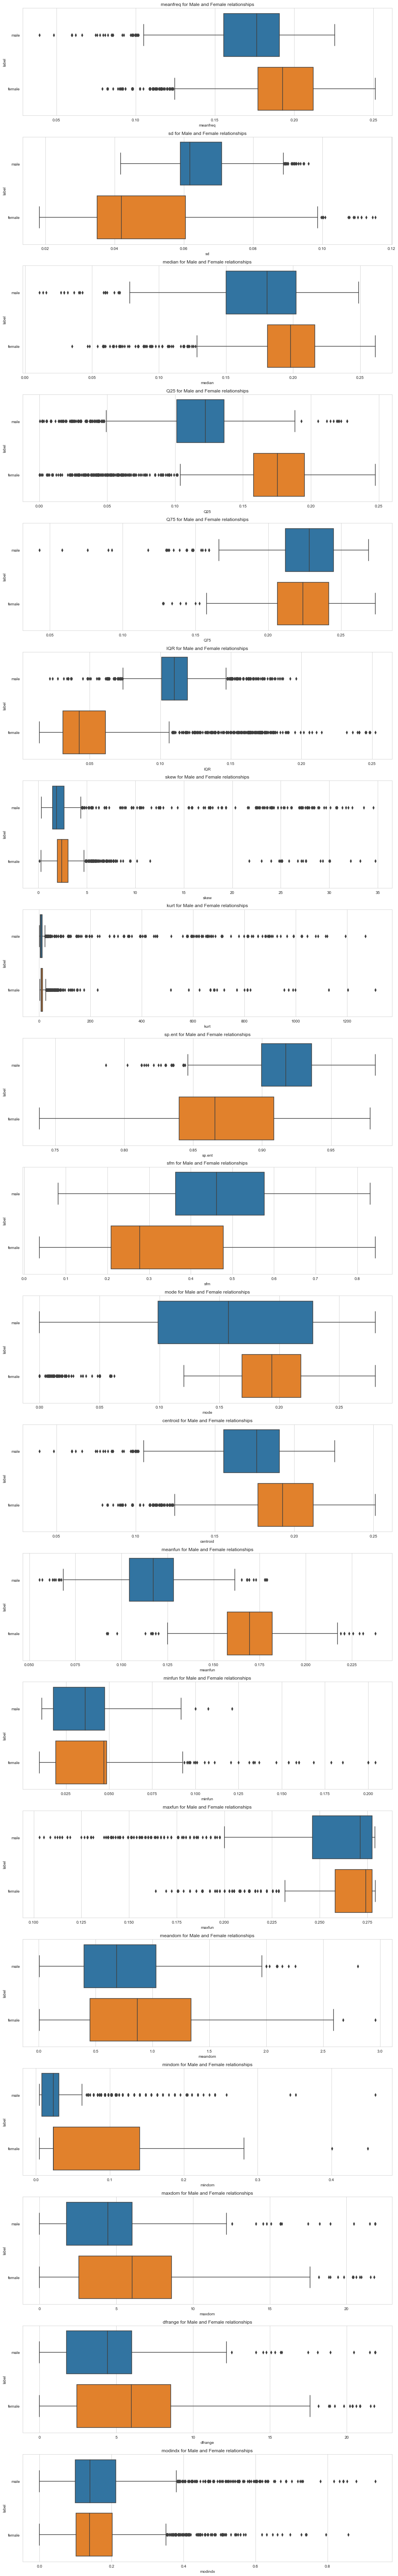

In [61]:
#code here
import seaborn as sns
fig, ax = plt.subplots(20,1, figsize=(14,90))
i = 0
for col in voice_df.drop(columns=['label']).columns.values.tolist():
    sns.boxplot(x=voice_df[col],y=voice_df['label'], ax=ax[i])
    ax[i].set_title("% s for Male and Female relationships"% col)
    i = i + 1
fig.tight_layout()
plt.show()

In [62]:
corr = voice_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


**2.3 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop those highly correlated features from the dataframe. Why is necessary to drop those columns before proceeding further?**

In [63]:
voice_y = voice_df['label']

In [64]:
def trimm_correlated(df_in, threshold):
    df_corr = df_in.corr(method='pearson', min_periods=1)
    df_not_correlated = ~(df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() >= threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
    df_out = df_in[un_corr_idx]
    return df_out

In [65]:
voice_df1 = trimm_correlated(voice_df, 0.9)

In [66]:
voice_df1['label'] = voice_y

In [67]:
# Split data into features and labels
voice_X = voice_df1.drop(columns=['label']) #replace "voice_df1" with your dataframe from 2.3 to make sure the code runs
voice_y = voice_df1['label']
print(voice_X.columns)

Index(['meanfreq', 'sd', 'Q75', 'IQR', 'skew', 'sp.ent', 'sfm', 'mode',
       'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom',
       'modindx'],
      dtype='object')


**2.4 Apply the following pre-processing steps:**

1) Use OrdinalEncoding to encode the label in the dataset (male & female)

2) Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.

3)Split the dataset into training (60%), validation (20%), and test (20%) sets.

4) Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.

5) Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [68]:
voice_df1

,meanfreq,sd,Q75,IQR,skew,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,mindom,maxdom,modindx,label
0,0.059781,0.064241,0.090193,0.075122,12.863462,0.893369,0.491918,0.000000,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,male
1,0.066009,0.067310,0.092666,0.073252,22.423285,0.892193,0.513724,0.000000,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.052632,male
2,0.077316,0.083829,0.131908,0.123207,30.757155,0.846389,0.478905,0.000000,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.046512,male
3,0.151228,0.072111,0.207955,0.111374,1.232831,0.963322,0.727232,0.083878,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.247119,male
4,0.135120,0.079146,0.206045,0.127325,1.101174,0.971955,0.783568,0.104261,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.201144,0.151859,1.762129,0.962934,0.763182,0.200836,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,0.161929,female
3164,0.116221,0.089221,0.204911,0.162193,0.693730,0.960716,0.709570,0.013683,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,0.277897,female
3165,0.142056,0.095798,0.224360,0.190936,1.876502,0.946854,0.654196,0.008006,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,0.194759,female
3166,0.143659,0.090628,0.219943,0.176435,1.591065,0.950436,0.675470,0.212202,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,0.311002,female


In [69]:
#code here
enc = OrdinalEncoder()

voice_df1['encoded_label'] = np.where(voice_df1['label'] == 'male', 1, 0)
voice_y = voice_df1['encoded_label']
voice_df1.drop('encoded_label', axis=1)
voice_y = voice_y.to_numpy()
voice_y = voice_y.reshape((voice_y.shape[0],1))

voice_X_dev, voice_X_test, voice_y_dev, voice_y_test = train_test_split(
    voice_X, voice_y, test_size=0.2, random_state=0)
voice_X_train, voice_X_val, voice_y_train, voice_y_val = train_test_split(
    voice_X_dev, voice_y_dev, test_size=0.25, random_state=0)


scaler = StandardScaler()
voice_X_train = scaler.fit_transform(voice_X_train)
voice_X_val = scaler.transform(voice_X_val)           
voice_X_test = scaler.transform(voice_X_test)

voice_X_train = np.hstack([np.ones((voice_X_train.shape[0], 1)), voice_X_train])
voice_X_val = np.hstack([np.ones((voice_X_val.shape[0], 1)), voice_X_val])
voice_X_test = np.hstack([np.ones((voice_X_test.shape[0], 1)), voice_X_test])

**2.5 Implement Logistic Regression**

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
> 
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


Implement a LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid. **You may NOT use sklearn for this implementation. It is highly recommended that you vectorize your code.**

In [70]:
import math

class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha, t, eta):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''
        ### Your code here
        losses = []
        num_rows, num_cols = X.shape
        self.w = np.zeros((num_cols,1))
        for i in range(self.t):
            self.w = self.w  - self.eta * self.calculate_gradient(X, y)
            curr_loss = self.calculate_loss(X, y)
            losses.append(curr_loss)
        losses_array = np.array(losses)
        return losses_array
        
    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold 
        the predicted probability to return a 0 or 1 prediction.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        ### Your code here
        values = self.calculate_sigmoid(np.matmul(X, self.w))
        values[values >= .5] = 1
        values[values < 1] = 0
        return values
    
    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w, 
        and alpha. Useful as a helper function for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        ### Your code here
        sigma_val = self.calculate_sigmoid(np.matmul(X,self.w))
        LHS = np.matmul(y.T, np.log(sigma_val))
        RHS = np.matmul((1 - y).T, np.log(1 - sigma_val))
        reg_term = self.alpha * np.linalg.norm(self.w,ord=2) * np.linalg.norm(self.w,ord=2)
        output = (-LHS - RHS + reg_term)[0]
        return output
    
    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss 
        using X, y, w, and alpha. Useful as a helper function 
        for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        ### Your code here
        inside = self.calculate_sigmoid(np.matmul(X, self.w)) - y
        gradient = np.matmul(X.T,inside) + 2*self.alpha*self.w
        return gradient
    
    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x. 
        Useful as a helper function for predict(), calculate_loss(), 
        and calculate_gradient().
        
        Parameters
        ----------
        x: (m x 1) vector
        
        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        ### Your code here
        sigmoid_x = []
        for curr_x in x:
            val = 1/(1 + pow(math.e, -curr_x[0])) #change if neccesary
            sigmoid_x.append([val],)
        sigmoid_x = np.array(sigmoid_x)
        return sigmoid_x

**2.6 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.**

A: Using your implementation above, train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the voice recognition training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge. 

B: Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)**, find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

C. Compare accuracy on the test dataset for both the scenarios.

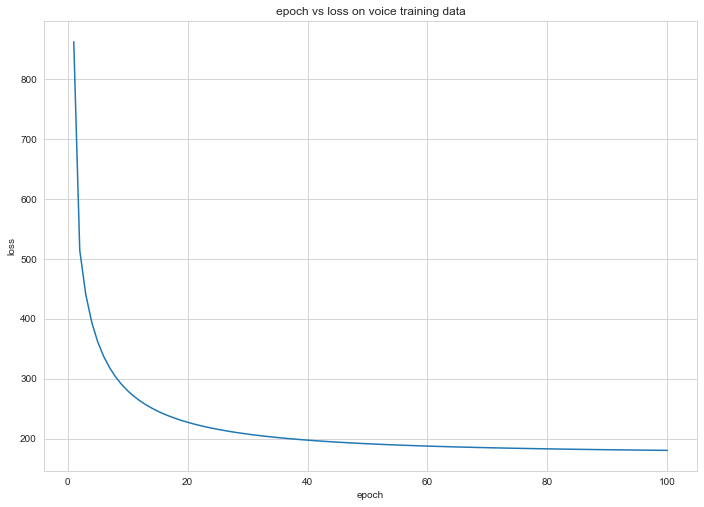

In [71]:
#code here
model = LogisticRegression(0, 100, 1e-3)
losses = model.train(voice_X_train,voice_y_train)
plt.plot(list(range(1,101)), losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('epoch vs loss on voice training data')
plt.show()

In [72]:
def print_label(labels):
    toret = []
    for i in labels:
        if i == 1:
            toret.append('male')
        else:
            toret.append('female')
    print(toret)

In [80]:
best_train = float("-inf")
best_val = float("-inf")
best_test = float("-inf")
best_hyper = {'alpha' : 0, 't' : 0, 'eta' : 0}
pred_test = []
_actual = []

for i in range(1, 21):

    model = LogisticRegression(i/20, i*5, i/100000 + 0.0008)
    model.train(voice_X_train,voice_y_train)
    
    y_pred_train = model.predict(voice_X_train)
    y_true_train = voice_y_train
    current_train = accuracy_score(y_true_train, y_pred_train)
    
    y_pred_val = model.predict(voice_X_val)
    y_true_val = voice_y_val
    current_val = accuracy_score(y_true_val, y_pred_val)
    
    y_pred_test = model.predict(voice_X_test)
    y_true_test = voice_y_test
    current_test = accuracy_score(y_true_test, y_pred_test)
    
    if current_train > best_train and current_val > best_val and current_test > best_test: 
        best_train = current_train
        best_val = current_val
        best_test = current_test
        best_hyper['alpha'] = i/20
        best_hyper['t'] = i*5
        best_hyper['eta'] = i/100000 + 0.0008
        pred_test = y_pred_test
        _actual = y_true_test
print(best_train)
print(best_val)
print(best_train)
print('best hyperparameters -->' , best_hyper)

print('first five predictions:')
print_label(pred_test[:5])
print('actual: ')
print_label(_actual[:5])

0.9689473684210527
0.9842271293375394
0.9689473684210527
best hyperparameters --> {'alpha': 0.4, 't': 40, 'eta': 0.00088}
first five predictions:
['female', 'male', 'female', 'female', 'male']
actual: 
['female', 'male', 'female', 'female', 'male']


**2.7 Feature Importance**

Interpret your trained model using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term! 

In [81]:
num_features_voice = ['meanfreq', 'sd', 'Q75', 'IQR', 'skew', 'sp.ent', 'sfm', 'mode', 'meanfun', 'minfun', 'maxfun',
               'meandom', 'mindom', 'maxdom', 'modindx']
all_features_voice = num_features_voice + ['Bias']
voice_df1['Bias'] = 1


In [82]:
len(model.w), len(all_features_voice)

(16, 16)

In [83]:
model.w

array([[-0.55774065],
       [-0.21250378],
       [ 0.16506164],
       [ 0.51191729],
       [ 1.43902154],
       [-0.43196364],
       [ 0.53675256],
       [-0.76813856],
       [ 0.0646603 ],
       [-4.12083387],
       [ 0.55080721],
       [-0.13764874],
       [-0.03262087],
       [-0.12422173],
       [-0.02431183],
       [-0.21985896]])

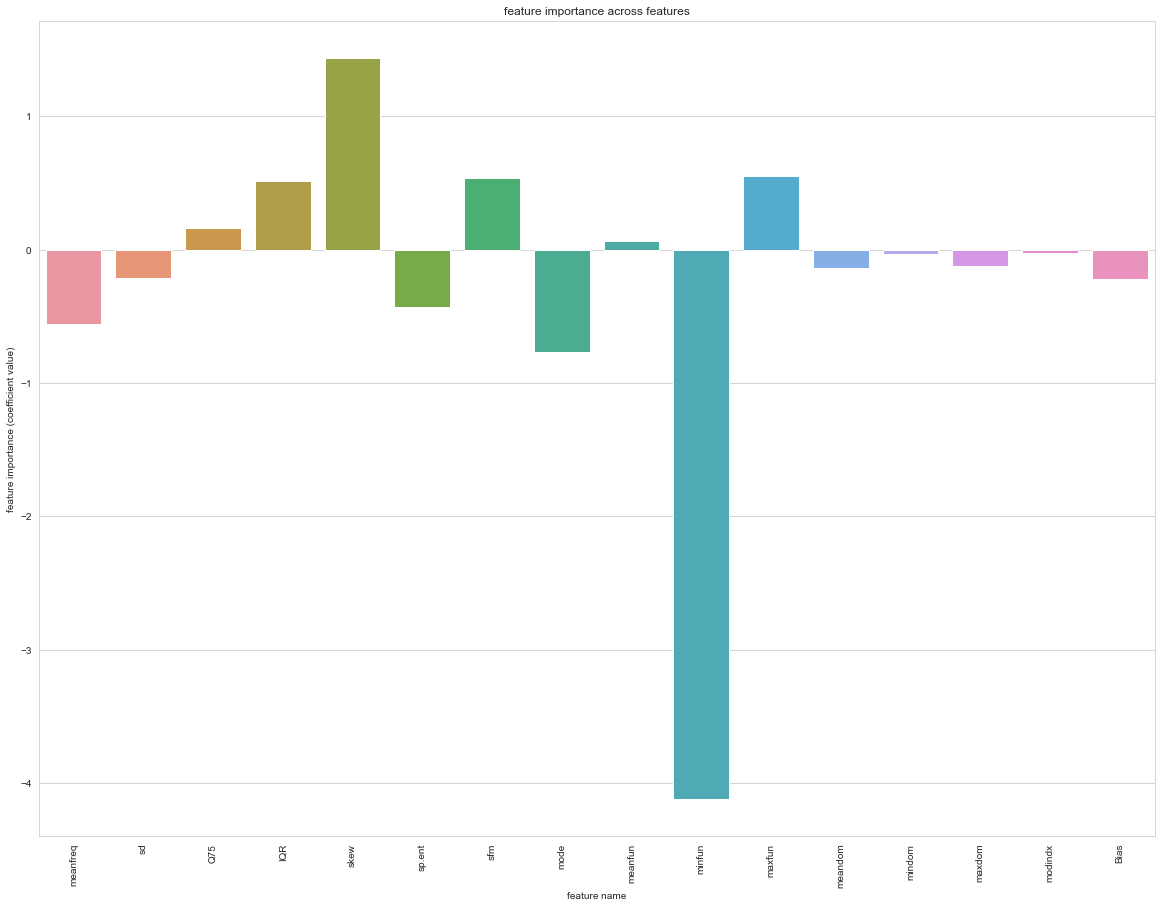

In [84]:
#code here
fig = plt.figure(figsize = (20,15))
xval = np.zeros((31))
yval = np.reshape(model.w, -1)
ax = sns.barplot(x=all_features_voice, y=yval)
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('feature name')
ax.set_ylabel('feature importance (coefficient value)')
ax.set_title('feature importance across features')
plt.show()


# **Part 3: Support Vector Machines - with the same Dataset**

**3.1 Dual SVM**

A) Train a dual SVM (with default parameters) for both kernel=“linear” and kernel=“rbf”) on the Voice Recognition training data.

B) Make predictions and report the accuracy on the training, validation, and test sets. Which kernel gave better accuracy on test dataset and why do you think that was better?

C) Please report the support vectors in both the cases and what do you observe? Explain


In [85]:
#code here
from sklearn import svm
dualModelSVM = svm.SVC(kernel='linear')
dualModelSVM.fit(voice_X_train,voice_y_train)

y_pred_train = dualModelSVM.predict(voice_X_train)
y_true_train = voice_y_train
print('accuracy on train set: ')
print (accuracy_score(y_true_train, y_pred_train))
y_pred_val = dualModelSVM.predict(voice_X_val)
y_true_val = voice_y_val
print('accuracy on val set: ')
print (accuracy_score(y_true_val, y_pred_val))

y_pred_test = dualModelSVM.predict(voice_X_test)
y_true_test = voice_y_test
print('accuracy on test set: ')
print (accuracy_score(y_true_test, y_pred_test))

print('first five predictions:')
print(y_pred_test[:5])
print('actual: ')
print(y_true_test[:5])

accuracy on train set: 
0.9742105263157895
accuracy on val set: 
0.9842271293375394
accuracy on test set: 
0.9700315457413249
first five predictions:
[0 1 0 0 1]
actual: 
[[0]
 [1]
 [0]
 [0]
 [1]]


/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [86]:
from sklearn import svm
dualModelSVM = svm.SVC(kernel='rbf')
dualModelSVM.fit(voice_X_train,voice_y_train)

y_pred_train = dualModelSVM.predict(voice_X_train)
y_true_train = voice_y_train
print('accuracy on train set: ')
print (accuracy_score(y_true_train, y_pred_train))
y_pred_val = dualModelSVM.predict(voice_X_val)
y_true_val = voice_y_val
print('accuracy on val set: ')
print (accuracy_score(y_true_val, y_pred_val))

y_pred_test = dualModelSVM.predict(voice_X_test)
y_true_test = voice_y_test
print('accuracy on test set: ')
print (accuracy_score(y_true_test, y_pred_test))

print('first five predictions:')
print(y_pred_test[:5])
print('actual: ')
print(y_true_test[:5])

accuracy on train set: 
0.9831578947368421
accuracy on val set: 
0.9810725552050473
accuracy on test set: 
0.9842271293375394
first five predictions:
[0 1 0 0 1]
actual: 
[[0]
 [1]
 [0]
 [0]
 [1]]


/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


**3.2 Using Kernel “rbf”, tune the hyperparameter “C” using the Grid Search & k-fold cross validation. You may take k=5 and assume values in grid between 1 to 100 with interval range of your choice.**

In [87]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

pipe = make_pipeline(GridSearchCV(LinearSVC(),
                                 param_grid = {"C":np.logspace(-3,3,20),
                                              "loss":["hinge", "squared_hinge"],
                                              "penalty":["l1","l2"]},
                                 return_train_score=True))
pipe.fit(voice_X_train,voice_y_train)
grid_search_results = pipe.named_steps["gridsearchcv"]
print(f"Best score:", grid_search_results.best_score_)
print(f"Best params:", grid_search_results.best_params_)
print(f"Test score:", pipe.score(voice_X_test,voice_y_test))

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_classes.py", line 234, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed 

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_classes.py", line 234, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Us

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Us

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Best score: 0.9705263157894738
Best params: {'C': 0.1623776739188721, 'loss': 'hinge', 'penalty': 'l2'}
Test score: 0.9700315457413249


/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

In [88]:
'''
Best score: 0.9705263157894738
Best params: {'C': 0.1623776739188721, 'loss': 'hinge', 'penalty': 'l2'}
Test score: 0.9700315457413249
'''

"\nBest score: 0.9705263157894738\nBest params: {'C': 0.1623776739188721, 'loss': 'hinge', 'penalty': 'l2'}\nTest score: 0.9700315457413249\n"